In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  cluster_std=1.5,
                  center_box=(-20.0, 20.0),
                  shuffle=True,
                  random_state=1)

For n_clusters = 2 The average silhouette_score is : 0.671254529880062
For n_clusters = 4 The average silhouette_score is : 0.6589343062357801
For n_clusters = 5 The average silhouette_score is : 0.6694228455067704
For n_clusters = 6 The average silhouette_score is : 0.5967193107939537
For n_clusters = 7 The average silhouette_score is : 0.5411728469272521


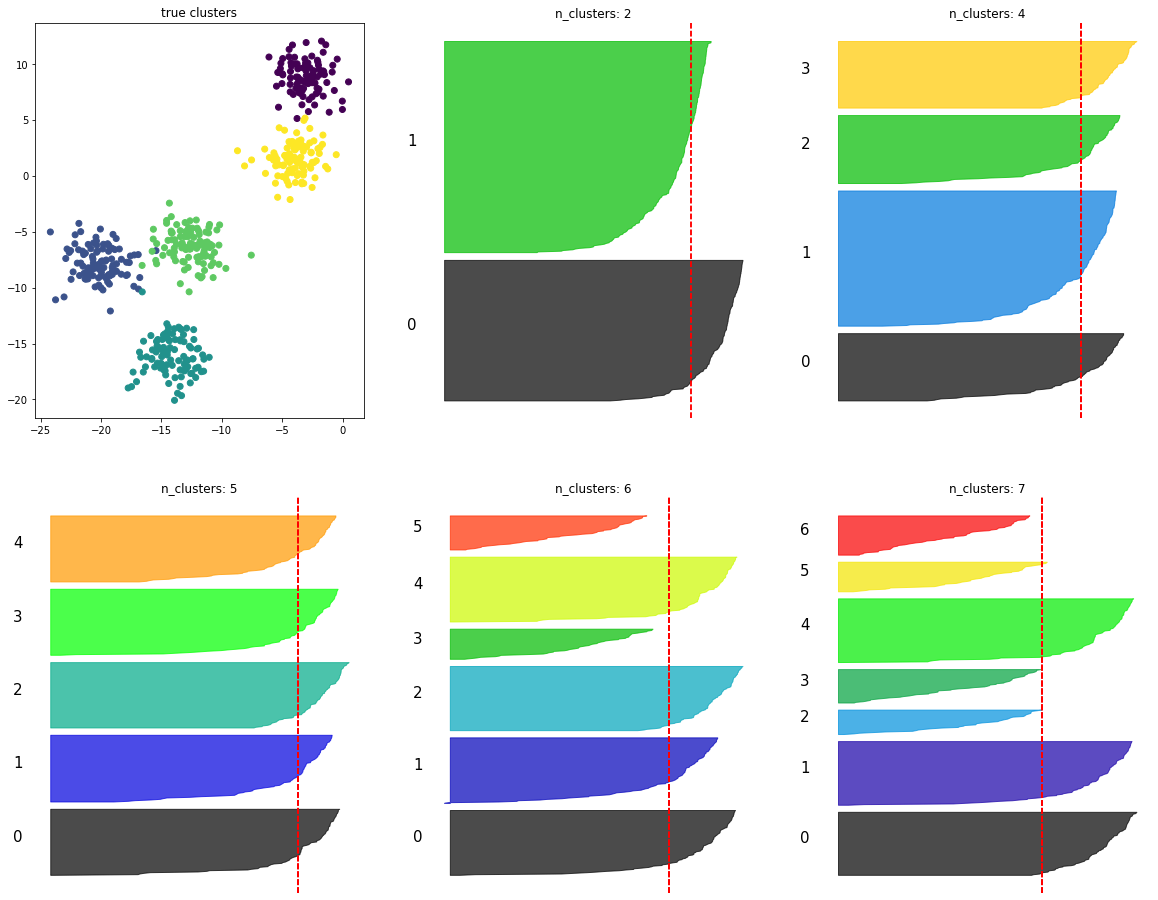

In [2]:
# Silhouette analysis from SKLearn documentation
# Direct link: 
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

from sklearn.metrics import silhouette_samples # sample individual scores
from sklearn.metrics import silhouette_score # cluster averaged scores

fig = plt.figure(figsize=(20,16))
k = 0
ax1 = fig.add_subplot(2,3,k+1)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('true clusters')
for n_clusters in [2,4,5,6,7]:
    k += 1
    ax1 = fig.add_subplot(2,3,k+1)
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.1, y_lower + 0.5 * size_cluster_i, str(i), fontsize=15)

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_title(f'n_clusters: {n_clusters}')
        plt.xticks([])
        plt.yticks([])
    plt.axis('off')

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import StratifiedShuffleSplit

data = fetch_openml('mnist_784', version=1)#Get data from https://www.openml.org/d/554
dfData = pd.DataFrame(np.c_[data["data"],data["target"]],columns = data["feature_names"]+["target"])
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in stratSplit.split(dfData[data["feature_names"]], dfData["target"]):
    X_train = dfData[data["feature_names"]].iloc[train_index]
    X_test = dfData[data["feature_names"]].iloc[test_index]
    
    y_train = dfData["target"].iloc[train_index]
    y_test = dfData["target"].iloc[test_index]

For n_clusters = 10 The average silhouette_score is : 0.4058234878326431
For n_clusters = 25 The average silhouette_score is : 0.3397597456439821
For n_clusters = 50 The average silhouette_score is : 0.36496138701129344
For n_clusters = 100 The average silhouette_score is : 0.36943873905644636


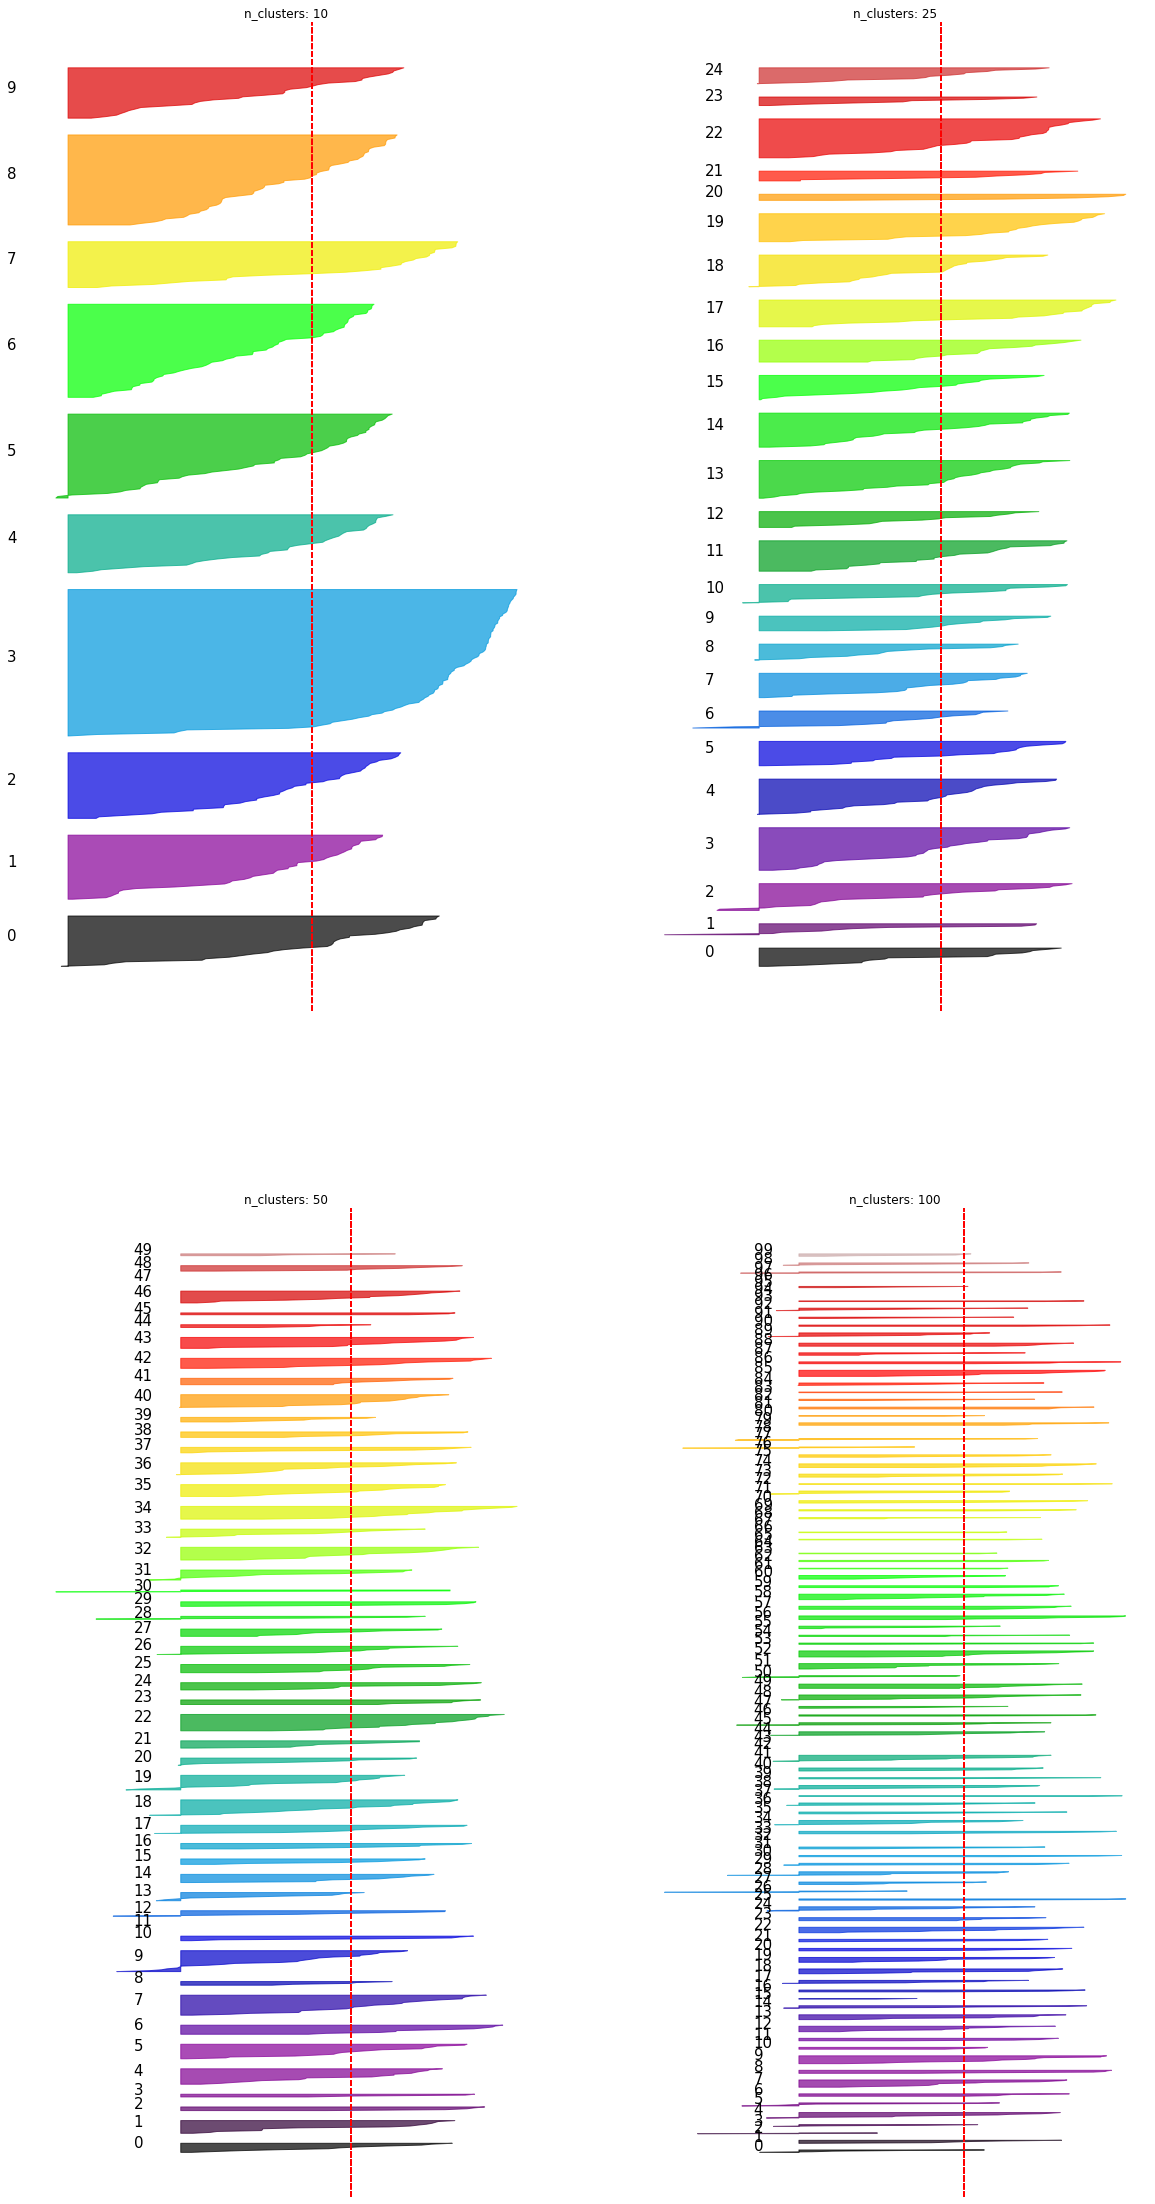

In [4]:
rows = 2
columns = 2
fig = plt.figure(figsize=(20,40))
k = 0
for n_clusters in [10,25,50,100]:
    k += 1
    ax1 = fig.add_subplot(rows,columns,k)
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.1, y_lower + 0.5 * size_cluster_i, str(i), fontsize=15)

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_title(f'n_clusters: {n_clusters}')
        plt.xticks([])
        plt.yticks([])
    plt.axis('off')

Notice the spikes into the negative in our 50 and 100 cluster cases, and partially already in the 25 cluster case. This indicates likely wrong cluster assignment for these instances.

50 and 100 cluster cases also have a lot of fluctuation between the different clusters.

Currently both 10 and 25 clusters looks good, but you can then do further exploration around and between the two, going up and down, to see if there's something that looks the best.

In [7]:
from sklearn.metrics import adjusted_rand_score

for n_clusters in [10,25,50,100]:
    km = KMeans(n_clusters=n_clusters, random_state=0)
    print('adjusted_rand_score:',round(adjusted_rand_score(km.fit_predict(X_train), y_train),2),
          f'for {n_clusters} clusters')

adjusted_rand_score: 0.37 for 10 clusters
adjusted_rand_score: 0.32 for 25 clusters
adjusted_rand_score: 0.21 for 50 clusters
adjusted_rand_score: 0.13 for 100 clusters


In [8]:
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score

for n_clusters in [10,25,50,100]:
    km = KMeans(n_clusters=n_clusters, random_state=0)
    print('homogeneity_score:',round(homogeneity_score(km.fit_predict(X_train), y_train),2),
          f'for {n_clusters} clusters')
    print('completeness_score:',round(completeness_score(km.fit_predict(X_train), y_train),2),
          f'for {n_clusters} clusters')
    print('v_measure_score:',round(v_measure_score(km.fit_predict(X_train), y_train),2),
          f'for {n_clusters} clusters')
    print()

homogeneity_score: 0.5 for 10 clusters
completeness_score: 0.5 for 10 clusters
v_measure_score: 0.5 for 10 clusters

homogeneity_score: 0.48 for 25 clusters
completeness_score: 0.66 for 25 clusters
v_measure_score: 0.56 for 25 clusters

homogeneity_score: 0.43 for 50 clusters
completeness_score: 0.73 for 50 clusters
v_measure_score: 0.54 for 50 clusters

homogeneity_score: 0.4 for 100 clusters
completeness_score: 0.8 for 100 clusters
v_measure_score: 0.53 for 100 clusters



Of course we'd want to see all these metrics when we do the clustering fit once, rather than re-fitting several times (especially with the same random seed). However, here we're splitting it so that we can look at it one at a time.